# A Recurrent Network Mechanism of Time Integration in Perceptual Decisions
Wong,  Wang
Journal of Neuroscience, January 2006, 26(4):1212-1328

## Material and Methods
### The two-variable network model

### Calling Library Fuctions

In [1]:
# LIBRARY

import numpy as np # vector manipulation
import math  # math functions
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


### The Reduced Network Model

In [2]:
def H(x):
    a=270 # Hz/nA
    b=108 # Hz
    d=.154 # seconds
    f=(a*x-b)/(1-np.exp(-d*(a*x-b)))
    return f
x=np.arange(-1,1,0.01)


### Neural Circuit
$$ x_{1}=J_{11}S_1-J_{12}S_2+I_{0}+I_{1}+I_{noise,1}$$
$$ x_{2}=J_{22}S_2-J_{21}S_1+I_{0}+I_{2}+I_{noise,1}$$

where the synaptic couplings are $J_{11}=0.2609$, $J_{22}=0.2609$, $J_{12}=0.0497$ and $J_{21}=0.0497$.
$I_{0}=0.3255 nA$ represents external input 


In [3]:
def total_synaptic_current(S_1,S_2,I_1,I_2,I_noise_1,I_noise_2):
    # Synaptic coupling
    J_11=0.2609 # nA
    J_22=0.2609 # nA
    J_12=0.0497 # nA
    J_21=0.0497 # nA
    I_0=0.3255  # nA
    x_1=J_11*S_1-J_12*S_2+I_0+I_1+I_noise_1
    x_2=J_22*S_2-J_21*S_1+I_0+I_2+I_noise_2
    return x_1, x_2


### Background activity
$$ \tau_{AMPA}\frac{d I_{noise,i}(t)}{dt} =-I_{noise,i}(t)+\eta_i(t)\sqrt{\tau_{AMPA}}\sigma_{noise}$$

In [4]:
def Background_Activity(I_noise):
    h=0.1
    sigma_noise=0.02 # nA
    tau_AMPA=2 #ms
    eta_noise=np.random.normal(0,1,1)
    k=0#(-(I_noise)+eta_noise*np.sqrt(tau_AMPA)*sigma_noise)
    I_noise_new=I_noise+h/tau_AMPA*(-(I_noise+h/2*k)+eta_noise
                                *np.sqrt(tau_AMPA)*sigma_noise)
    return I_noise_new

### Network Dynamics
$$ \frac{d S_{i}}{dt} =-\frac{S_{i}}{\tau_S}+(1-S_{i})\gamma H_{i}$$

In [5]:
def Network_Dynamics(S,x):
    h=0.1/1000 #ms
    gamma=0.641
    tau_S=.100 #s
    k=(-S/tau_S+(1-S)*gamma*H(x)/1)
    S_new=S+h*(-(S+h/2*k)/tau_S+(1-S+h/2*k)*gamma*H(x))
    return S_new

def Network_Dynamics_nuncill(x):
    h=0.1/1000 #ms
    gamma=0.641
    tau_S=.100 #s
    S_new=tau_S*gamma*H(x)/(1+tau_S*gamma*H(x))
    return S_new

### Input Current Target

$$ I_i=J_{A,ext}\mu_0\left(1+ \frac{c'}{100} \right) $$


In [6]:
def I_input_1(c_dash):
    J_A_ext=5.2/10000 # nA/Hz
    mu_0=30 # Hz
    I_motion=J_A_ext*mu_0*(1+(c_dash)/100)
    return I_motion

$$ I_2=J_{A,ext}\mu_0\left(1- \frac{c'}{100} \right) $$

In [7]:
def I_input_2(c_dash):
    J_A_ext=0.00052 # nA/Hz
    mu_0=30 # Hz
    I_motion=J_A_ext*mu_0*(1-(c_dash)/100)
    return I_motion

In [29]:
h=0.1
time=np.arange(0,100000,h)
J_A_ext=0.00052 # nA/Hz
mu_0=30 # Hz
Vector_coherence=[0.0]

Threshold=15
N=1
RT_coh_hit=np.zeros(len(Vector_coherence))
RT_coh_miss=np.zeros(len(Vector_coherence))
Prob=np.zeros(len(Vector_coherence))
count=0
#fig = plt.figure(figsize=(12,8))

ALL_F_1=0.2*np.ones((N,len(time)))
ALL_F_2=0.2*np.ones((N,len(time)))
I_1=0.0*np.ones(len(time)) # np.zeros((1,len(time)))
I_2=0.0*np.ones(len(time)) # np.zeros((1,len(time)))
Firing_target_1=0*time # np.zeros((1,len(time)))
Firing_target_2=0*time # np.zeros((1,len(time)))




I_noise_1=0.001*np.random.normal(0,1,len(time))
I_noise_2=0.001*np.random.normal(0,1,len(time))

x_1=J_A_ext*mu_0*np.random.uniform(0,1,len(time))
x_2=J_A_ext*mu_0*np.random.uniform(0,1,len(time))

S_1=np.random.uniform(0,1,len(time))#0.1*np.random.uniform(0,1,len(time))# np.random.normal(0,1,len(time))*0.0004
S_2=np.random.uniform(0,1,len(time)) #0.1*np.random.uniform(0,1,len(time)) #np.random.normal(0,1,len(time))*0.0004

S_1[0]=0.02
S_2[0]=0.5


count=0
for i in range (0,len(time)-1):



    I_noise_1[i+1]=0*Background_Activity(I_noise_1[i])
    I_noise_2[i+1]=0*Background_Activity(I_noise_2[i])

    I_1[i+1]=0*I_input_1(c_dash)
    I_2[i+1]=0*I_input_1(-c_dash)

    x_1[i+1],x_2[i+1]=total_synaptic_current(S_1[i],S_2[i],I_1[i],I_2[i],I_noise_1[i],I_noise_2[i])
    S_1[i+1]=Network_Dynamics_nuncill(x_1[i+1])
    S_2[i+1]=Network_Dynamics(S_2[i],x_2[i+1])


### Plotting
#### Input

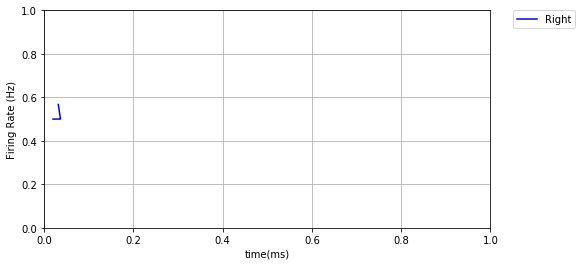

In [30]:
fig = plt.figure(figsize=(8,4))

plt.plot(S_1,S_2,'-',color='blue',label="Right")
#plt.plot(time,Firing_target_2,'-',color='red',label="Left")
plt.grid()
plt.xlabel('time(ms)')
plt.ylabel('Firing Rate (Hz)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('Example_Firing_Pattern.png', bbox_inches='tight',dpi=300)
plt.xlim(0,1)
plt.ylim(0,1)

# plt.
#plt.ylim((30,50))
plt.show()
